# Preparatory data processing with Pandas

## Preparing data and libs

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(6)  # set rng
pd.options.display.float_format ="{:,.3f}".format
file_path = './Version 6.html'

df = pd.read_html(file_path, index_col=0, parse_dates=['date'])[0]
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000,84.500,0.000,"1,015.667"
1,2013-01-02,7.400,92.000,2.980,"1,017.800"
2,2013-01-03,7.167,87.000,4.633,"1,018.667"
3,2013-01-04,8.667,71.333,1.233,"1,017.167"
4,2013-01-05,6.000,86.833,3.700,"1,016.500"


## Rename columns

In [73]:
df.rename(columns={
    'meantemp': 'temperature',
    'meanpressure': 'pressure',
}, inplace=True)
df.head()

,date,temperature,humidity,wind_speed,pressure
0,2013-01-01,10.000,84.500,0.000,"1,015.667"
1,2013-01-02,7.400,92.000,2.980,"1,017.800"
2,2013-01-03,7.167,87.000,4.633,"1,018.667"
3,2013-01-04,8.667,71.333,1.233,"1,017.167"
4,2013-01-05,6.000,86.833,3.700,"1,016.500"


In [74]:
df_date = df.pop('date')   # saving dates for future processing
df.head()

,temperature,humidity,wind_speed,pressure
0,10.000,84.500,0.000,"1,015.667"
1,7.400,92.000,2.980,"1,017.800"
2,7.167,87.000,4.633,"1,018.667"
3,8.667,71.333,1.233,"1,017.167"
4,6.000,86.833,3.700,"1,016.500"


## Data before cleaning

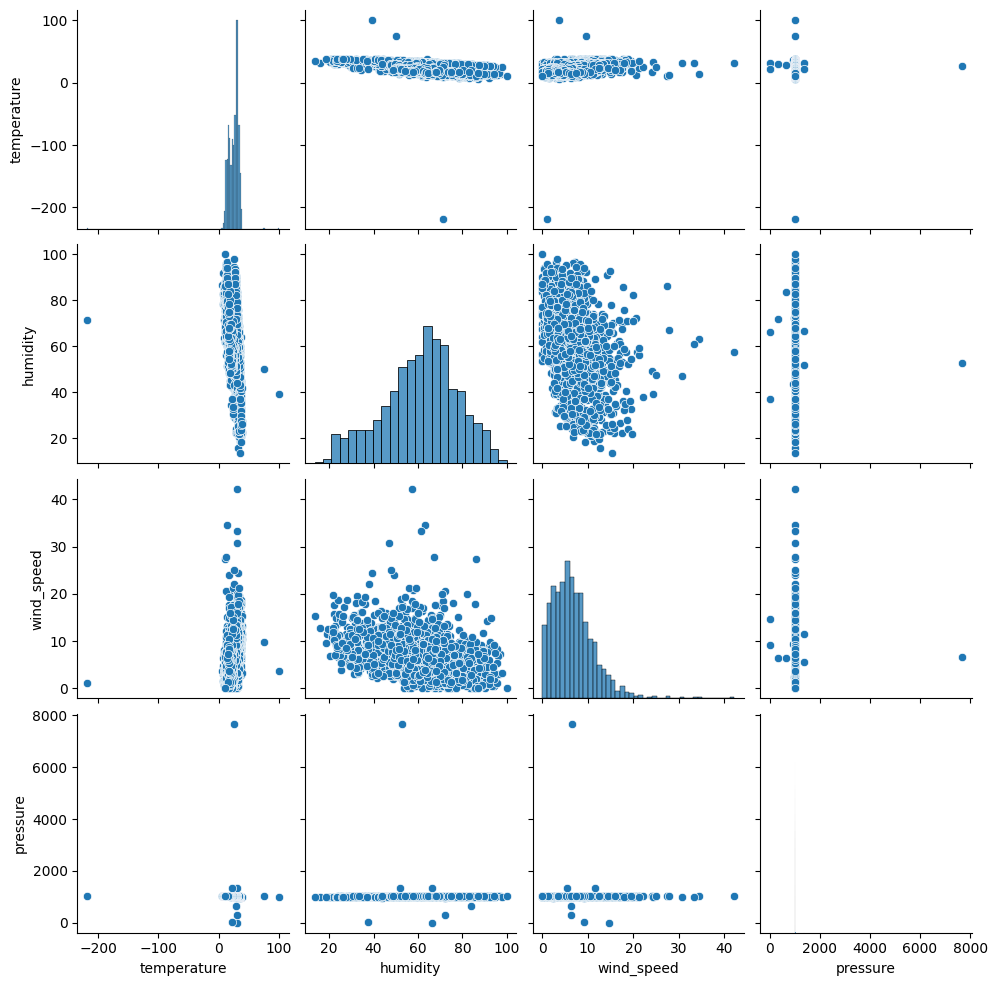

In [75]:
sns.pairplot(df)
plt.show()

## Detecting outliers (выбросы)

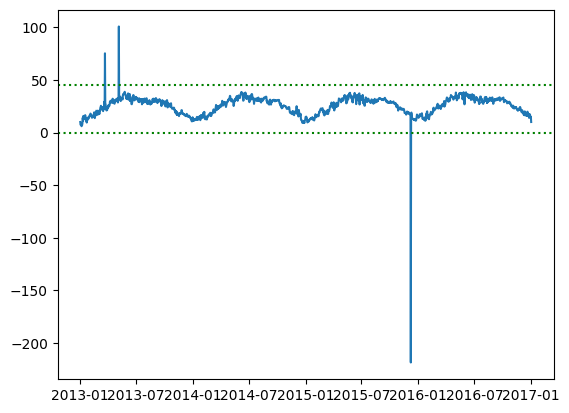

In [76]:
temp_bottom_threshold = 0
temp_ceil_threshold = 45
plt.plot(df_date, df['temperature'])
plt.axhline(temp_bottom_threshold, color='green', linestyle=':')
plt.axhline(temp_ceil_threshold, color='green', linestyle=':')
plt.show()

## Removing temperature outliers

In [77]:
df['temperature'].loc[
    (temp_bottom_threshold > df['temperature']) | (df['temperature'] > temp_ceil_threshold)
] = np.NaN

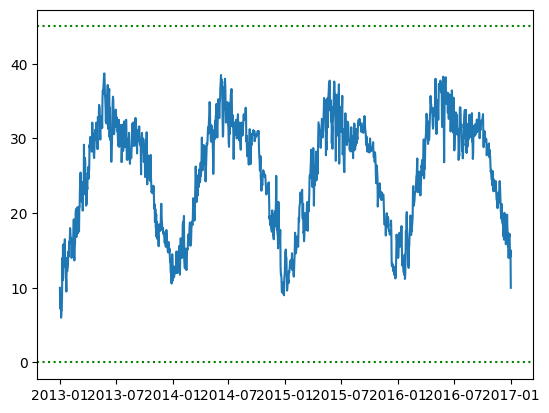

In [78]:
plt.plot(df_date, df['temperature'])
plt.axhline(temp_bottom_threshold, color='green', linestyle=':')
plt.axhline(temp_ceil_threshold, color='green', linestyle=':')
plt.show()

## Checking humidity outliers

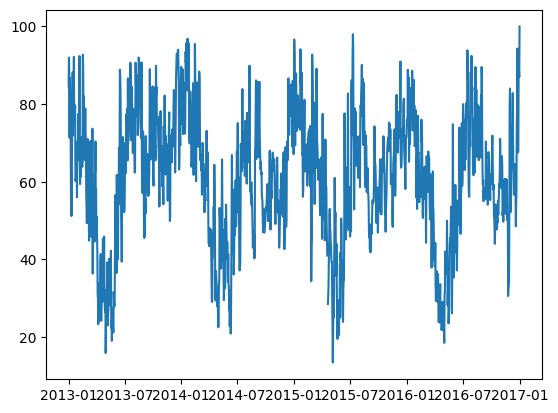

In [79]:
plt.plot(df_date, df["humidity"])
plt.show()

## Checking wind_speed outliers

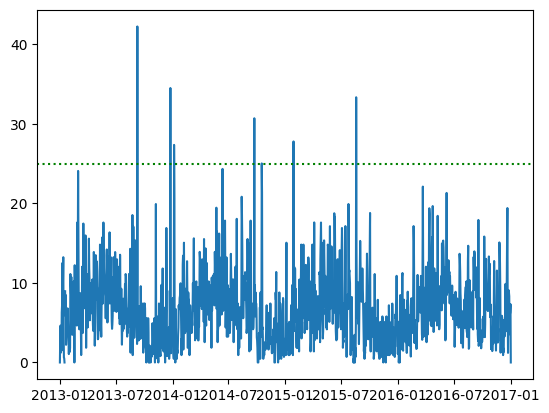

In [80]:
wind_ceil_threshold = 25
plt.plot(df_date, df["wind_speed"])
plt.axhline(wind_ceil_threshold, color='green', linestyle=':')
plt.show()

In [81]:
df['wind_speed'].loc[df['wind_speed'] > wind_ceil_threshold] = wind_ceil_threshold

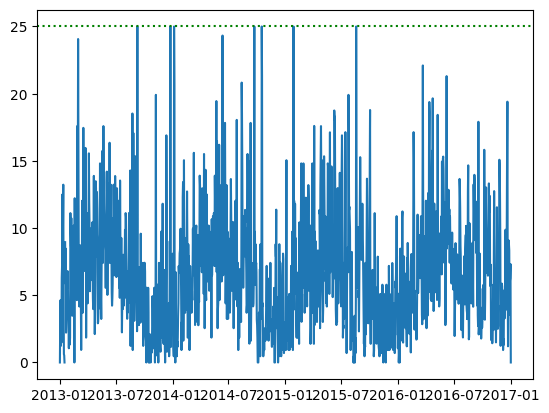

In [82]:
plt.plot(df_date, df["wind_speed"])
plt.axhline(wind_ceil_threshold, color='green', linestyle=':')
plt.show()

## Checking pressure outliers

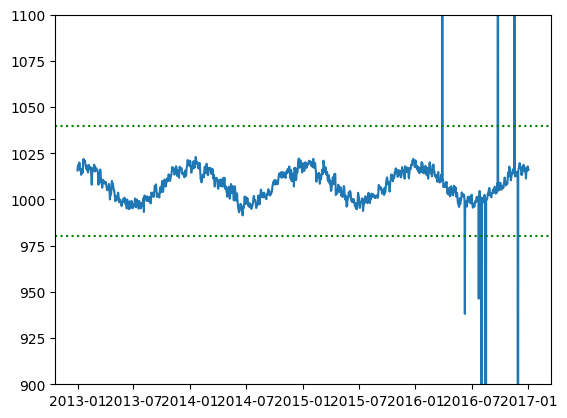

In [83]:
pressure_bottom_threshold = 980
pressure_ceil_threshold = 1040
plt.plot(df_date, df["pressure"])
plt.axhline(pressure_bottom_threshold, color="green", linestyle=":")
plt.axhline(pressure_ceil_threshold, color="green", linestyle=":")
plt.ylim(900, 1100)
plt.show()

In [84]:
df["pressure"].loc[
    (df["pressure"] > pressure_ceil_threshold) | (df["pressure"] < pressure_bottom_threshold)
] = np.NaN

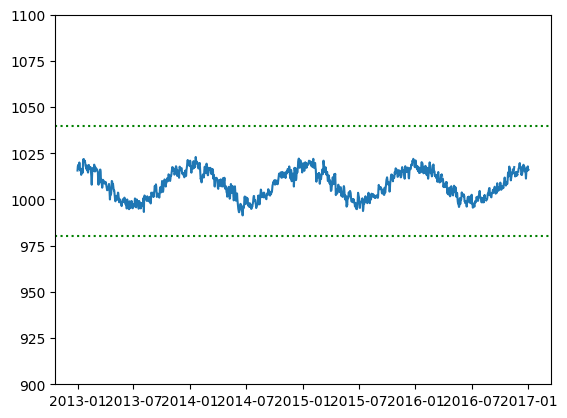

In [85]:
plt.plot(df_date, df["pressure"])
plt.axhline(pressure_bottom_threshold, color="green", linestyle=":")
plt.axhline(pressure_ceil_threshold, color="green", linestyle=":")
plt.ylim(900, 1100)
plt.show()

## Filling invalid values in columns

In [86]:
df.isna().sum()

temperature     6
humidity        2
wind_speed      5
pressure       11
dtype: int64

In [87]:
df.fillna(method="ffill", inplace=True)  # set previous not-nan value from column
df.isna().sum()

temperature    0
humidity       0
wind_speed     0
pressure       0
dtype: int64

## Normalizing data for proper view

In [93]:
df_norm = (df.copy() - df.mean()) / df.std()
df_norm['date'] = df_date
df_norm.head()

,temperature,humidity,wind_speed,pressure,date
0,-2.114,1.412,-1.541,1.001,2013-01-01
1,-2.468,1.859,-0.862,1.288,2013-01-02
2,-2.500,1.561,-0.486,1.404,2013-01-03
3,-2.296,0.626,-1.260,1.203,2013-01-04
4,-2.659,1.551,-0.698,1.113,2013-01-05


## Checking resulting data after cleaning

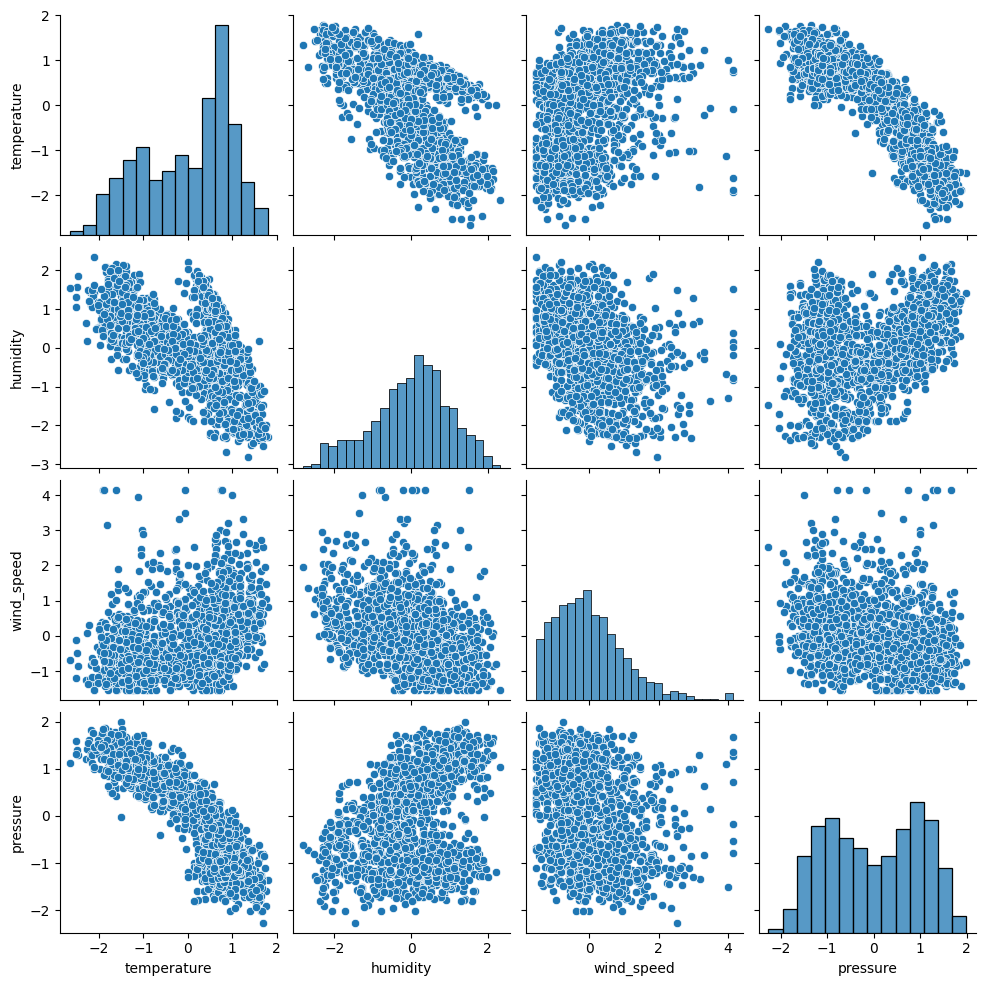

In [89]:
sns.pairplot(df_norm)
plt.show()